In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sn
%matplotlib inline
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

In [3]:
data = pd.read_csv("C:\\Users\\Hello\\Desktop\\Data science\\Impurity test project\\MiningProcess_Flotation_Plant_Database.csv",decimal=",")

In [3]:
data.head()

,date,% Iron Feed,% Silica Feed,Starch Flow,Amina Flow,Ore Pulp Flow,Ore Pulp pH,Ore Pulp Density,Flotation Column 01 Air Flow,Flotation Column 02 Air Flow,Flotation Column 03 Air Flow,Flotation Column 04 Air Flow,Flotation Column 05 Air Flow,Flotation Column 06 Air Flow,Flotation Column 07 Air Flow,Flotation Column 01 Level,Flotation Column 02 Level,Flotation Column 03 Level,Flotation Column 04 Level,Flotation Column 05 Level,Flotation Column 06 Level,Flotation Column 07 Level,% Iron Concentrate,% Silica Concentrate
0,2017-03-10 01:00:00,55.2,16.98,3019.53,557.434,395.713,10.0664,1.74,249.214,253.235,250.576,295.096,306.4,250.225,250.884,457.396,432.962,424.954,443.558,502.255,446.370,523.344,66.91,1.31
1,2017-03-10 01:00:00,55.2,16.98,3024.41,563.965,397.383,10.0672,1.74,249.719,250.532,250.862,295.096,306.4,250.137,248.994,451.891,429.560,432.939,448.086,496.363,445.922,498.075,66.91,1.31
2,2017-03-10 01:00:00,55.2,16.98,3043.46,568.054,399.668,10.0680,1.74,249.741,247.874,250.313,295.096,306.4,251.345,248.071,451.240,468.927,434.610,449.688,484.411,447.826,458.567,66.91,1.31
3,2017-03-10 01:00:00,55.2,16.98,3047.36,568.665,397.939,10.0689,1.74,249.917,254.487,250.049,295.096,306.4,250.422,251.147,452.441,458.165,442.865,446.210,471.411,437.690,427.669,66.91,1.31
4,2017-03-10 01:00:00,55.2,16.98,3033.69,558.167,400.254,10.0697,1.74,250.203,252.136,249.895,295.096,306.4,249.983,248.928,452.441,452.900,450.523,453.670,462.598,443.682,425.679,66.91,1.31


In [4]:
#Checking the datatype of each column of the data
data.dtypes

date                             object
% Iron Feed                     float64
% Silica Feed                   float64
Starch Flow                     float64
Amina Flow                      float64
Ore Pulp Flow                   float64
Ore Pulp pH                     float64
Ore Pulp Density                float64
Flotation Column 01 Air Flow    float64
Flotation Column 02 Air Flow    float64
Flotation Column 03 Air Flow    float64
Flotation Column 04 Air Flow    float64
Flotation Column 05 Air Flow    float64
Flotation Column 06 Air Flow    float64
Flotation Column 07 Air Flow    float64
Flotation Column 01 Level       float64
Flotation Column 02 Level       float64
Flotation Column 03 Level       float64
Flotation Column 04 Level       float64
Flotation Column 05 Level       float64
Flotation Column 06 Level       float64
Flotation Column 07 Level       float64
% Iron Concentrate              float64
% Silica Concentrate            float64
dtype: object

In [5]:
#Converting the date column to proper date and time datatype
data["date"] = pd.to_datetime(data["date"])

In [6]:
descriptive = data.describe()
descriptive

,% Iron Feed,% Silica Feed,Starch Flow,Amina Flow,Ore Pulp Flow,Ore Pulp pH,Ore Pulp Density,Flotation Column 01 Air Flow,Flotation Column 02 Air Flow,Flotation Column 03 Air Flow,Flotation Column 04 Air Flow,Flotation Column 05 Air Flow,Flotation Column 06 Air Flow,Flotation Column 07 Air Flow,Flotation Column 01 Level,Flotation Column 02 Level,Flotation Column 03 Level,Flotation Column 04 Level,Flotation Column 05 Level,Flotation Column 06 Level,Flotation Column 07 Level,% Iron Concentrate,% Silica Concentrate
count,737453.000000,737453.000000,737453.000000,737453.000000,737453.000000,737453.000000,737453.000000,737453.000000,737453.000000,737453.000000,737453.000000,737453.000000,737453.000000,737453.000000,737453.000000,737453.000000,737453.000000,737453.000000,737453.000000,737453.000000,737453.000000,737453.000000,737453.000000
mean,56.294739,14.651716,2869.140569,488.144697,397.578372,9.767639,1.680380,280.151856,277.159965,281.082397,299.447794,299.917814,292.071485,290.754856,520.244823,522.649555,531.352662,420.320973,425.251706,429.941018,421.021231,65.050068,2.326763
std,5.157744,6.807439,1215.203734,91.230534,9.699785,0.387007,0.069249,29.621288,30.149357,28.558268,2.572538,3.636579,30.217804,28.670105,131.014924,128.165050,150.842164,91.794432,84.535822,89.862225,84.891491,1.118645,1.125554
min,42.740000,1.310000,0.002026,241.669000,376.249000,8.753340,1.519820,175.510000,175.156000,176.469000,292.195000,286.295000,189.928000,185.962000,149.218000,210.752000,126.255000,162.201000,166.991000,155.841000,175.349000,62.050000,0.600000
25%,52.670000,8.940000,2076.320000,431.796000,394.264000,9.527360,1.647310,250.281000,250.457000,250.855000,298.262566,298.068000,262.541000,256.302000,416.978000,441.883000,411.325000,356.679000,357.653000,358.497000,356.772000,64.370000,1.440000
50%,56.080000,13.850000,3018.430000,504.393000,399.249000,9.798100,1.697600,299.344000,296.223000,298.696000,299.805000,299.887120,299.477000,299.011000,491.878000,495.956000,494.318000,411.974000,408.773000,424.664575,411.065000,65.210000,2.000000
75%,59.720000,19.600000,3727.730000,553.257000,402.968000,10.038000,1.728330,300.149000,300.690000,300.382000,300.638000,301.791137,303.061000,301.904000,594.114000,595.464000,601.249000,485.549000,484.329000,492.684000,476.465000,65.860000,3.010000
max,65.780000,33.400000,6300.230000,739.538000,418.641000,10.808100,1.853250,373.871000,375.992000,364.346000,305.871000,310.270000,370.910000,371.593000,862.274000,828.919000,886.822000,680.359000,675.644000,698.861000,659.902000,68.010000,5.530000


In [7]:
data.isnull().sum()
##No null values in dataset

date                            0
% Iron Feed                     0
% Silica Feed                   0
Starch Flow                     0
Amina Flow                      0
Ore Pulp Flow                   0
Ore Pulp pH                     0
Ore Pulp Density                0
Flotation Column 01 Air Flow    0
Flotation Column 02 Air Flow    0
Flotation Column 03 Air Flow    0
Flotation Column 04 Air Flow    0
Flotation Column 05 Air Flow    0
Flotation Column 06 Air Flow    0
Flotation Column 07 Air Flow    0
Flotation Column 01 Level       0
Flotation Column 02 Level       0
Flotation Column 03 Level       0
Flotation Column 04 Level       0
Flotation Column 05 Level       0
Flotation Column 06 Level       0
Flotation Column 07 Level       0
% Iron Concentrate              0
% Silica Concentrate            0
dtype: int64

In [8]:
##Checking for the outliers in the dataset, in each of the variable separately.

def detect_outliers(x):
    q1 = np.percentile(x,25)
    q3 = np.percentile(x,75)
    iqr = q3-q1
    lower = q1-(1.5*iqr)
    upper = q3+(1.5*iqr)
    outlier_indices = list(x.index[(x<lower)|(x>upper)])
    outlier_values = list(x[outlier_indices])
    
    return outlier_indices, outlier_values


In [9]:
##Checking for %Iron feed varaible
ironfeed_indices, ironfeed_values = detect_outliers(data["% Iron Feed"])

In [10]:
print(np.sort(ironfeed_values))
print(np.sort(ironfeed_indices))

##There are no outliers in this %iron feed varaible

[]
[]


In [11]:
print(pd.DataFrame(ironfeed_indices).shape)
print(pd.DataFrame(ironfeed_values).shape)
##This shows there are no outliers in %iron feed variable

(0, 0)
(0, 0)


In [12]:
##Checking for %silica feed vaiable for the outliers
silicafeed_indices,silicafeed_values = detect_outliers(data["% Silica Feed"])                                              

In [13]:
print(np.sort(silicafeed_indices))
print(np.sort(silicafeed_values))

###Shows no outliers

[]
[]


In [14]:
print(pd.DataFrame(silicafeed_indices).shape)
print(pd.DataFrame(silicafeed_values).shape)

##This also shows that there are no outliers

(0, 0)
(0, 0)


In [15]:
###Checking for Starch flow for outliers

starch_ind, starch_values = detect_outliers(data["Starch Flow"])

In [16]:
print(np.sort(starch_ind))
print(np.sort(starch_values))

##There are outliers

[  4437   4438   4439 ... 698247 698262 698290]
[6204.88       6205.01136364 6205.21570093 ... 6299.46       6299.88
 6300.23      ]


In [17]:
print(pd.DataFrame(starch_ind).shape)
print(pd.DataFrame(starch_values).shape)

##There are 1137 outliers

(1137, 1)
(1137, 1)


In [18]:
###Checking for Amina Flow

amina_ind, amina_val = detect_outliers(data["Amina Flow"])

In [19]:
print(np.sort(amina_ind))
print(np.sort(amina_val))

##There are outliers

[  3904  21140  21141 ... 732809 732818 735623]
[241.669 241.688 241.694 ... 739.489 739.504 739.538]


In [20]:
print(pd.DataFrame(amina_ind).shape)
print(pd.DataFrame(amina_val).shape)

##There are 8627 outliers.


(8627, 1)
(8627, 1)


In [21]:
### Checking for Ore Pulp Flow

pulpflow_ind, pulpflow_val = detect_outliers(data["Ore Pulp Flow"])

In [22]:
print(np.sort(pulpflow_ind))
print(np.sort(pulpflow_val))

##There are outliers

[  1452   2656   2985 ... 737437 737438 737446]
[376.249 376.249 376.249 ... 418.64  418.641 418.641]


In [23]:
print(pd.DataFrame(pulpflow_ind).shape)
print(pd.DataFrame(pulpflow_val).shape)

###There are 109043 outliers

(109043, 1)
(109043, 1)


In [24]:
##Checking for outliers in ore pulp pH
ph_ind, ph_val = detect_outliers(data["Ore Pulp pH"])


In [25]:
print(np.sort(ph_ind))
print(np.sort(ph_val))

##There are outliers

[ 22066  22067  22068 ... 718865 718866 719024]
[ 8.75334     8.75337     8.75337016 ... 10.8080625  10.8081
 10.8081    ]


In [26]:
print(pd.DataFrame(ph_ind).shape)
print(pd.DataFrame(ph_val).shape)

##There are 11002 outliers

(11002, 1)
(11002, 1)


In [27]:
##Checking outliers for Ore Pulp Density
density_ind, density_val = detect_outliers(data["Ore Pulp Density"])

In [28]:
print(np.sort(density_ind))
print(np.sort(density_val))
##There are outliers

[  4155   4156   4157 ... 734341 734342 734343]
[1.51982    1.51982304 1.51982608 ... 1.85322857 1.85323929 1.85325   ]


In [29]:
print(pd.DataFrame(density_ind).shape)
print(pd.DataFrame(density_val).shape)

##There are 43058 number of outliers

(43058, 1)
(43058, 1)


In [30]:
##Checking outliers for % Iron Concentrate 
ironcon_ind, ironcon_val = detect_outliers(data["% Iron Concentrate"])

In [31]:
print(np.sort(ironcon_ind))
print(np.sort(ironcon_val))

##There are outliers

[ 48751  48752  48753 ... 716750 716751 716752]
[62.05       62.05       62.05       ... 62.13477247 62.13487236
 62.13497225]


In [32]:
print(pd.DataFrame(ironcon_ind).shape)
print(pd.DataFrame(ironcon_val).shape)
##There 1590 ouliers in this variable

(1590, 1)
(1590, 1)


In [33]:
###Checking for Flotation Column 01 Air Flow
float1air_ind, float1air_val = detect_outliers(data["Flotation Column 01 Air Flow"])

In [34]:
print(np.sort(float1air_ind))
print(np.sort(float1air_val))

##There are no outliers

[]
[]


In [35]:
print(pd.DataFrame(float1air_ind).shape)
print(pd.DataFrame(float1air_val).shape)

##There are no outliers

(0, 0)
(0, 0)


In [36]:
##Checking for Flotation Column 02 Air Flow
float2air_ind, float2air_val = detect_outliers(data["Flotation Column 02 Air Flow"])

In [37]:
print(np.sort(float2air_ind))
print(np.sort(float2air_val))

##There are no outliers

[]
[]


In [38]:
print(pd.DataFrame(float2air_ind).shape)
print(pd.DataFrame(float2air_ind).shape)
##There are no outliers

(0, 0)
(0, 0)


In [39]:
##Checking for Flotation Column 03 Air Flow
float3air_ind, float3air_val = detect_outliers(data["Flotation Column 03 Air Flow"])

In [40]:
print(np.sort(float3air_ind))
print(np.sort(float3air_val))
##There are outliers

[34932 34933 34934 34935 34936 34937 34938 34939 34940 34941 34942 34943
 34944 34945 34946 34947 34948 34949 34950 34951 34952 34953 34954 34955
 34956 34957 34958 34959 34960 34961 34962 34963 34964]
[176.469      176.47191716 176.47483432 176.47775147 176.48066863
 176.48358579 176.48650295 176.48942011 176.49233727 176.49525442
 176.49817158 176.50108874 176.5040059  176.50692306 176.50984022
 176.51275737 176.51567453 176.51859169 176.52150885 176.52442601
 176.52734317 176.53026032 176.53317748 176.53609464 176.5390118
 176.54192896 176.54484612 176.54776327 176.55068043 176.55359759
 176.55651475 176.55943191 176.56234907]


In [41]:
print(pd.DataFrame(float3air_ind).shape)
print(pd.DataFrame(float3air_val).shape)

##There are 33 outliers

(33, 1)
(33, 1)


In [42]:
##Checking for Flotation Column 04 Air Flow
float4air_ind, float4air_val = detect_outliers(data["Flotation Column 04 Air Flow"])

In [43]:
print(np.sort(float4air_ind))
print(np.sort(float4air_val))
##There are outliers

[130438 130439 130440 ... 736966 737043 737144]
[292.195 292.218 292.228 ... 305.864 305.868 305.871]


In [44]:
print(pd.DataFrame(float4air_ind).shape)
print(pd.DataFrame(float4air_val).shape)
##There are 54191 number of outliers

(54191, 1)
(54191, 1)


In [45]:
##Checking for Flotation Column 05 Air Flow
float5air_ind , float5air_val = detect_outliers(data["Flotation Column 05 Air Flow"])

In [46]:
print(np.sort(float5air_ind))
print(np.sort(float5air_val))
##There are outliers

[100304 100305 100306 ... 719021 731747 733093]
[286.295      286.369      286.54108696 ... 310.117      310.123
 310.27      ]


In [47]:
print(pd.DataFrame(float5air_ind).shape)
print(pd.DataFrame(float5air_val).shape)
##There are 29474 number of outliers

(29474, 1)
(29474, 1)


In [48]:
##Checking for Flotation Column 06 Air Flow
float6air_ind, float6air_val = detect_outliers(data["Flotation Column 06 Air Flow"])

In [49]:
print(np.sort(float6air_ind))
print(np.sort(float6air_val))
##There are outliers

[ 82466  82467  82468 ... 737290 737421 737425]
[189.928 190.146 190.219 ... 370.909 370.909 370.91 ]


In [50]:
print(pd.DataFrame(float6air_ind).shape)
print(pd.DataFrame(float6air_val).shape)
##There are 9432 outliers

(9432, 1)
(9432, 1)


In [51]:
#Checking for Flotation Column 07 Air Flow
float7air_ind, float7air_val = detect_outliers(data["Flotation Column 07 Air Flow"])

In [52]:
print(np.sort(float7air_ind))
print(np.sort(float7air_val))
##There are outliers

[556190 563557 563589 563669 564233 564243 564812 566481 569318 569650
 569695 569828 570033 570053 570307 570315 571920 571921 571922 571923
 571924 571925 571926 571927 571928 571929 571930 571931 571932 571933
 571934 571935 571936 571937 571938 571939 571940 571941 571942 571943
 571944 571945 571946 571947 571948 571949 571950 571951 571952 571953
 571954 571955 571956 571957 571958 571959 571960 571961 571962 571963
 571964 571965 571966 571967 571968 571969 571970 571971 571972 571973
 571974 571975 571976 571977 605142 605160 605167 605481 606203 606204
 623844 627471 687101 687122 687366 687528 687615 687830 687844 687864
 687927 688233 688432 688821 688855 688960 689085 689090 691629 691683
 691740 691746 692208 692272 692460 692465 692791 692978 693481 693745
 693973 694105 694125 694165 694330 694495 694997 695327 695360 695467
 695590 695882 696042 696043 696111 696506 696676 696743 696858 696867
 697148 697454 697777 697903 698015 698045 698275 698431 698754 698844
 69889

In [53]:
print(pd.DataFrame(float7air_ind).shape)
print(pd.DataFrame(float7air_val).shape)
##There are 276 outliers

(276, 1)
(276, 1)


In [54]:
##Checking outliers for Flotation Column 01 Level
float1_ind, float1_val = detect_outliers(data["Flotation Column 01 Level"])

In [55]:
print(np.sort(float1_ind))
print(np.sort(float1_val))
##There are outliers

[  5780  12924  12925  12926  13986  14680  21441  21442  21879  26933
  29350  29351  29352  29353  29354  29715  29716  29717  29899  29900
  29901  29902  29903  29904  29905  29906  29907  29908  29909  29910
  29911  29912  29923  29924  29925  29926  29927  29928  29929  29930
  29931  29932  29933  29934  29935  29936  29937  29938  29939  29940
  29941  29942  29943  29944  29945  29946  29947  29948  29949  29950
  29951  29952  29953  29954  29955  29956  29957  29958  29959  29960
  29961  29962  29963  29964  29965  29966  29967  29968  29969  29970
  29971  29972  29973  29974  29975  29976  29977  29978  29979  29980
  29981  29982  29983  29984  29985  29986  29987  29988  29989  29990
  29991  29992  29993  29994  29995  29996  29997  29998  29999  30000
  30001  30002  30575  30576  30577  30578  30579  30580  30581  30582
  30583  30584  30585  30586  30587  30588  30589  30590  30591  30592
  30593  30594  30595  30596  30597  30598  30599  30600  30601  30602
  3060

In [56]:
print(pd.DataFrame(float1_ind).shape)
print(pd.DataFrame(float1_val).shape)
##There are 854 outliers

(854, 1)
(854, 1)


In [57]:
##Checking for Flotation Column 02 Level
float2_ind, float2_val =  detect_outliers(data["Flotation Column 02 Level"])

In [58]:
print(np.sort(float2_ind))
print(np.sort(float2_val))
##There are outliers

[  5535   6017   6998 ... 719833 720496 723225]
[210.752 210.76  210.768 ... 828.894 828.903 828.919]


In [59]:
print(pd.DataFrame(float2_ind).shape)
print(pd.DataFrame(float2_val).shape)
##There are 1564 outliers

(1564, 1)
(1564, 1)


In [60]:
##Checking for Flotation Column 03 Level
float3_ind, float3_val = detect_outliers(data["Flotation Column 03 Level"])

In [61]:
print(np.sort(float3_ind))
print(np.sort(float3_val))
##There are outliers

[ 26839  27174  27175  27176  27376  27377  27453  27454  27455  27456
  27457  27621  27622  27623  27624  27625  27626  27627  27628  27629
  27630  27631  27632  27633  27634  27635  27636  27637  27638  27639
  27640  27641  27642  27643  27644  27645  27646  27647  27648  27649
  27650  27651  27652  27653  27654  27655  27656  27657  27658  27659
  27660  27661  27662  27663  27664  27665  27666  27667  27668  27669
  27670  27683  27684  27685  27686  27687  27688  27689  27690  27691
  27692  27693  27694  27695  27696  27697  27698  27699  27700  27701
  27702  27703  27704  27705  27706  27707  27708  27709  27710  27711
  27712  27713  27714  27751  27752  27753  27754  27755  27756  27838
  27877  27878  27958  27959  27961  27993  27994  27995  27996  27997
  28061  28062  28063  28064  28065  28066  28067  28176  28177  28178
  28179  28370  28371  28372  28373  28374  28375  28453  28454  28455
  28456  28457  28458  28459  28460  28461  28485  28486  28487  28488
  2855

In [62]:
print(pd.DataFrame(float3_ind).shape)
print(pd.DataFrame(float3_val).shape)
##There are 531 outliers

(531, 1)
(531, 1)


In [63]:
##Checking for Flotation Column 04 Level
float4_ind, float4_val = detect_outliers(data["Flotation Column 04 Level"])

In [64]:
print(np.sort(float4_ind))
print(np.sort(float4_val))
##There are outliers

[  3701   3702   4030   4031   4032   4033   4034   4035   4036   4037
   4142   4782   5448   9710   9711   9970  13192  14033  14112  14332
  15256  16014  17418  17756  23477  26670  28389  28425  28500  28533
  28562  28735  28754  28999  30304  34654  39724  41101  41102  41103
  42181  43939  46055  46137  48981  50320  50589  50590  50591  50592
  50593  50594  50595  50596  50597  50598  52504  52505  52506  52507
  52508  52509  52510  52511  52512  52513  52514  52515  52516  52517
  52518  52519  52520  53432  54770  66028  66030  66031  66292  66293
  66445  66446  66648  66684  66868  66869  66870  66871  66872  67003
  67186  75720  75721  75722  75723  75724  75725  79013  79142  79156
  79157  79158  79159  79160  79161  79638  80001  84820  84821  84822
  84823  84824  84825  84826  84827  84828 105499 105624 120014 120016
 120017 120018 120019 120020 120021 125635 125639 125640 125641 134851
 134852 134853 134854 142954 143212 143213 143214 143215 143216 143217
 14321

In [65]:
print(pd.DataFrame(float4_ind).shape)
print(pd.DataFrame(float4_val).shape)
##There are 462 outliers

(462, 1)
(462, 1)


In [66]:
##Checking for Flotation Column 05 Level
float5_ind, float5_val = detect_outliers(data["Flotation Column 05 Level"])

In [67]:
print(np.sort(float5_ind))
print(np.sort(float5_val))
##There are outliers

[  4032   4033   4214   5533   5805   6753   6763  12326  13460  13461
  13950  15084  15123  19752  19753  19754  27027  28437  28664  29049
  30229  31686  49965  51531  66932  68262  69752 114857 114858 114859
 114860 114861 114862 114863 114864 114865 114866 114867 114868 114869
 114870 114871 114872 114873 114874 114875 114876 114877 114878 114879
 114880 114881 114882 114883 114884 114885 114886 114887 114888 114889
 114890 114891 114892 114893 114894 114895 127110 127111 132456 143657
 143658 143659 143660 143661 143662 143663 143664 143665 143666 143667
 143668 143669 143670 143671 143672 143673 143674 143723 143724 143725
 143726 143740 145807 145808 145809 145810 145811 145812 145813 145814
 145815 145816 145817 145818 145819 145820 253608 253609 296526 296543
 328937 346440 355846 357966 388883 392078 449301 449302 449754 449755
 449756 449757 449758 449759 449760 449761 449762 449763 449764 449765
 449766 449767 449768 449769 449770 449771 449772 449773 449774 449775
 44977

In [68]:
print(pd.DataFrame(float5_ind).shape)
print(pd.DataFrame(float5_val).shape)
##There are 236 outliers

(236, 1)
(236, 1)


In [69]:
##Checking for Flotation Column 06 Level
float6_ind, float6_val = detect_outliers(data["Flotation Column 06 Level"])

In [70]:
print(np.sort(float6_ind))
print(np.sort(float6_val))
##There are outliers

[  3453   4757   5534 ... 709196 709197 713525]
[155.841 156.004 156.267 ... 698.853 698.861 698.861]


In [71]:
print(pd.DataFrame(float6_ind).shape)
print(pd.DataFrame(float6_val).shape)
##There are 2740 outliers

(2740, 1)
(2740, 1)


In [72]:
###Checking for Flotation Column 07 Level
float7_ind, float7_val = detect_outliers(data["Flotation Column 07 Level"])

In [73]:
print(np.sort(float7_ind))
print(np.sort(float7_val))
##There are outliers

[  3499   4062   4129   4393   4927   5326   5388   5649   5672   5792
   6811  10044  10903  12074  12075  12076  12358  12359  13052  13349
  13581  13582  13658  14299  14335  15083  15105  15124  15427  15523
  15524  16231  17695  19375  20271  21871  21872  21873  21955  21957
  21958  21959  21960  22065  22089  22607  24413  26624  26625  28245
  28539  31789  31790  31791  31792  31793  31794  32349  32357  32370
  34708  43630  44463  48983  49766  49767  52182  53689  53690  54122
  65014  66689  66874  67006  67235  67684  67685  67686  67687  67688
  67689  67690  69853  78884  79162  80140  80141  80142  80143  80144
  80145  80146  80147  80148  80149  80150  80151  80152  81563  81564
  81565  81566  81567  81568  81569  81570  86731  88881  92248  92357
  94357  94473 117666 120269 120270 120271 120272 120273 120447 120585
 120638 121992 130707 130708 134121 136767 138108 143210 143211 143212
 143213 143214 143215 143216 143217 143218 143219 143220 143221 143222
 14322

In [74]:
print(pd.DataFrame(float7_ind).shape)
print(pd.DataFrame(float7_val).shape)
##There are 467 outliers

(467, 1)
(467, 1)


In [75]:
##Checking for the output variable(% Silica Concentrate) for outliers
silicacon_ind, silicacon_val = detect_outliers(data["% Silica Concentrate"])

In [76]:
print(np.sort(silicacon_ind))
print(np.sort(silicacon_val))
##There are outliers

[ 27534  27535  27536 ... 684611 684612 684613]
[5.36500693 5.36505205 5.36508324 ... 5.53       5.53       5.53      ]


In [77]:
print(pd.DataFrame(silicacon_ind).shape)
print(pd.DataFrame(silicacon_val).shape)
##There are 4757 outliers

(4757, 1)
(4757, 1)


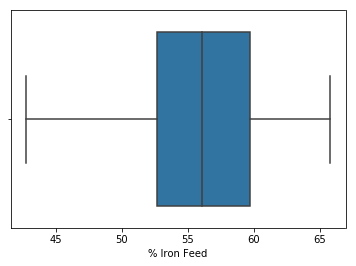

In [78]:
#Visualizing the outliers using boxplot
##% Iron Feed
sn.boxplot(data["% Iron Feed"])
##There are no outliers.The same as the result of code.
## left skewed.(subjective) but mean is approximately equal to median.


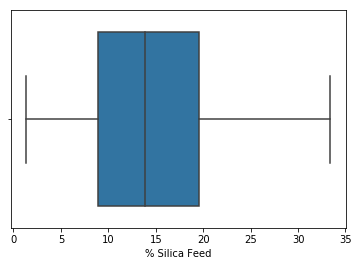

In [79]:
#% Silica Feed
sn.boxplot(data["% Silica Feed"])
#There are no outliers, and the data is slightly right skewed(subjective).
##From summary it is right skewed as mean>median


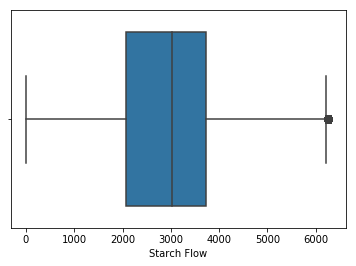

In [80]:
##Starch Flow
sn.boxplot(data["Starch Flow"])
#There are outliers above the upper wisker. It shows slighlty left skewed (subjective).
##From summary it is left skewed as mean<median


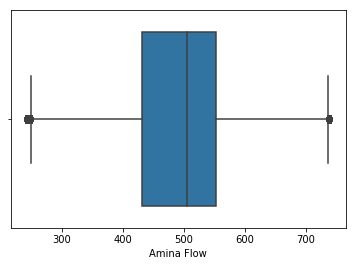

In [81]:
#Amina Flow
sn.boxplot(data["Amina Flow"])
##There are outliers and data is left skewed(subjective).
## from the summayr we can also say that it is left skewed as mean<median

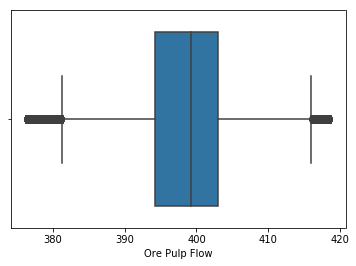

In [82]:
##Ore Pulp Flow
sn.boxplot(data["Ore Pulp Flow"])
#there are outliers and the visualization shows that there is left skewness(subjective).
##From the summary we can say that left skewed as mean<median


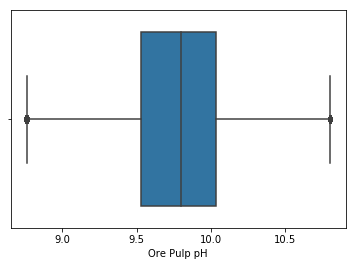

In [83]:
##Ore Pulp pH
sn.boxplot(data["Ore Pulp pH"])
##There are outliers and there is slightly left skewness (subjective).
##From summary we can say that it is left skewed as mean<median


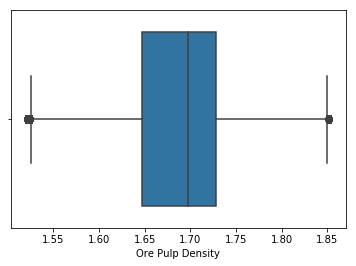

In [84]:
##Ore Pulp Density
sn.boxplot(data["Ore Pulp Density"])
##There are outliers and by the boxplot there is left skewness(subjective) as the median is near to 3rd quartile
####From summary we can say that it is mean<median


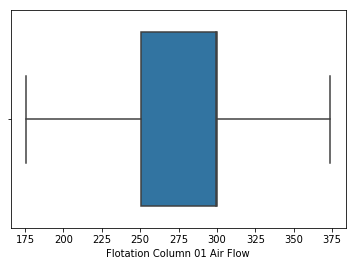

In [85]:
##Flotation Column 01 Air Flow
sn.boxplot(data["Flotation Column 01 Air Flow"])
##There are no outliers and the data is left Skewed i.e negative skewed(subjective) as the median is towards the 3rd quartile.
##From the summary we can say that it is left skewed as mean<median.

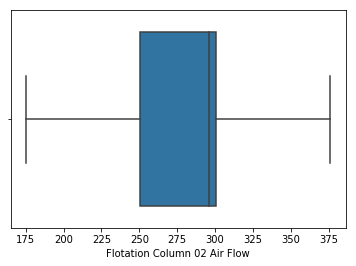

In [86]:
###Flotation Column 02 Air Flow
sn.boxplot(data["Flotation Column 02 Air Flow"])
##There are no outliers the data is Left skewed i.e negative skewed (subjective) as the median is towards the 3rd quartile.
##From summary we can say that it is left skewed as mean<median

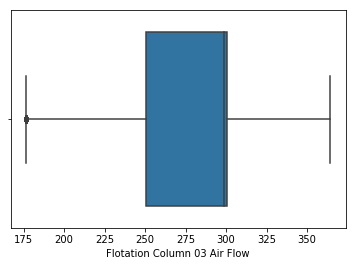

In [87]:
##Flotation Column 03 Air Flow
sn.boxplot(data["Flotation Column 03 Air Flow"])
##There are outliers and the data is left skewed i.e negative skewed (subjective) as the median is towards the 3rd quartile.
##From summary we can say that it is left skewed as mean<median

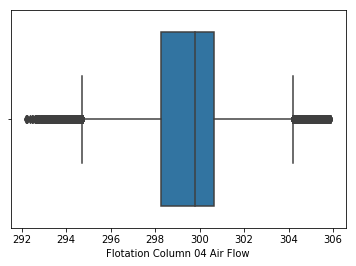

In [88]:
###Flotation Column 04 Air Flow
sn.boxplot(data["Flotation Column 04 Air Flow"])
##There are outliers and it may be slight left skewed(subjective) as the median is towards 3rd quartile.
##From summary we can say that it is left skewed as mean<median(very minimual decrease)

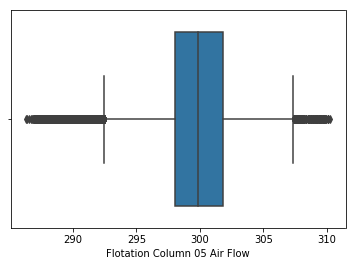

In [89]:
###Flotation Column 05 Air Flow
sn.boxplot(data["Flotation Column 05 Air Flow"])
##There are many outliers and no skewness(subjective). 
##Even in summary mean is approx. equal to median.


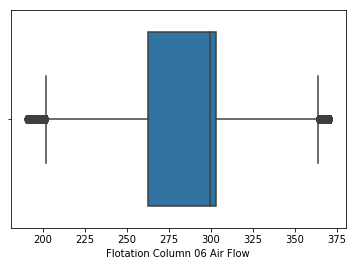

In [90]:
##Flotation Column 06 Air Flow
sn.boxplot(data["Flotation Column 06 Air Flow"])
##There are outliers and left skewed i.e. negative skewed(subjective) as the median is towards the 3rd quartile.
####From summary we can say that it is left skewed as mean<median.


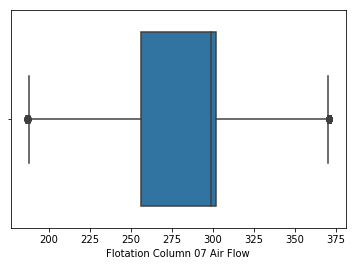

In [91]:
##Flotation Column 07 Air Flow
sn.boxplot(data["Flotation Column 07 Air Flow"])
##There are outliers and sightly left skewed (subjective )as the median is towards the 3rd quartile
##From summary we can it is left skewed as it is mean<median 

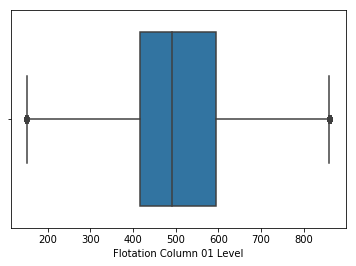

In [92]:
##Flotation Column 01 Level
sn.boxplot(data["Flotation Column 01 Level"])
##There are outliers and slightly right skewed (Subjective) as median is towards 1st quartile.
##From the summary we can sat that it is right skewed as mean>median

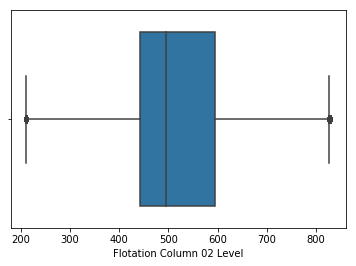

In [93]:
##Flotation Column 02 Level
sn.boxplot(data["Flotation Column 02 Level"])
##There are outliers and it is slightly right skewed (Subjective) as the median is towards the 1st quartile
##From the summary we can say that data is right skewed as mean>median. 

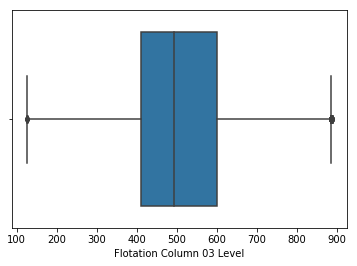

In [94]:
##Flotation Column 03 Level
sn.boxplot(data["Flotation Column 03 Level"])
##There are outliers and data is slightly right skewed(Subjective) as the median is towards the 1st quartile.
##From summary we see that the data is right skewed as mean>median. 


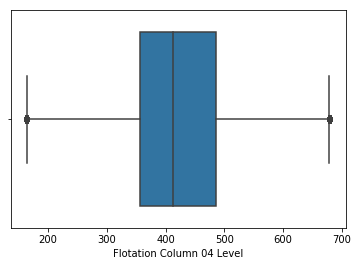

In [95]:
##Flotation Column 04 Level
sn.boxplot(data["Flotation Column 04 Level"])
##There are outliers and data is slightly right skewed(subjective)i.e can say very less, as the median is towards the 1st quartile.
##From summary also it looks right skewed as the mean>median.

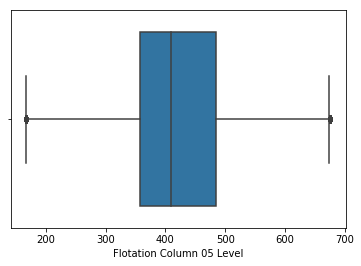

In [96]:
##Flotation Column 05 Level
sn.boxplot(data["Flotation Column 05 Level"])
##There are outliers and data is right skewed(subjective) as the median is towards 1st quartile.
##From summary we can say right skewed as the mean>median.


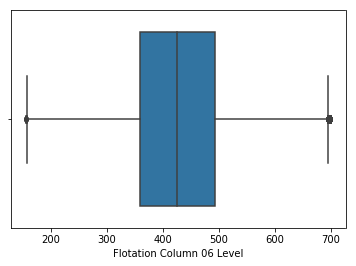

In [97]:
##Flotation Column 06 Level
sn.boxplot(data["Flotation Column 06 Level"])
##There are outliers and no skewness (Subjective) from boxplot. If we look at the summary mean> median which shows it is:
## slightly right skewed.


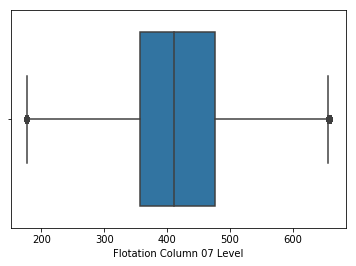

In [98]:
##Flotation Column 07 Level
sn.boxplot(data["Flotation Column 07 Level"])
##There are outliers and as mean>median(from summary) we can say that it is right skewed(Subjective)

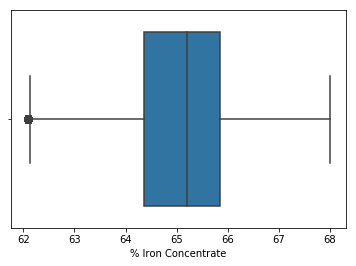

In [99]:
##Visualizing % Iron Concentrate
sn.boxplot(data["% Iron Concentrate"])
##There are outliers and data is left skewed from boxplot as median is towards third quatile. 
##mean<median(aprroximately equal) from summary shows left skewed.

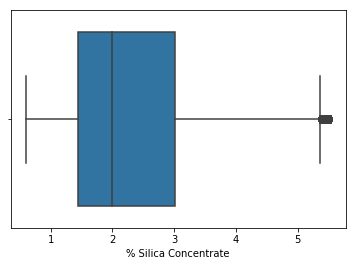

In [100]:
##Visualizing % Silica Concentrate (Output variable)
sn.boxplot(data["% Silica Concentrate"])
#There are outliers and data is clearly right skewed


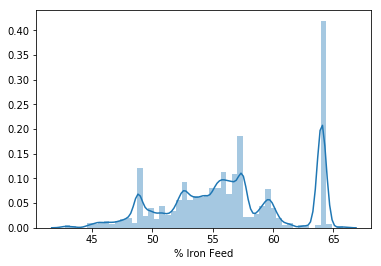

In [101]:
##Visualizing distribution of the data
sn.distplot(data["% Iron Feed"], kde =True)
## Left skewed
##Not normally distributed and there is huge spike around 63%-64% of iron feed. 
##Most of the iron ore used has 63%-64% iron which is fed in the fotation cell.

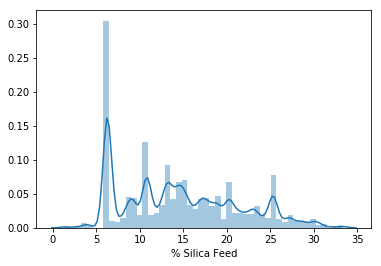

In [102]:
sn.distplot(data["% Silica Feed"],kde = True)
##Right skewed
##Data is not normally distributed and there is a huge spike in between 5%-7% may be.
##In this range, most of the iron ore has the % of silica which is feed to flotation cell.

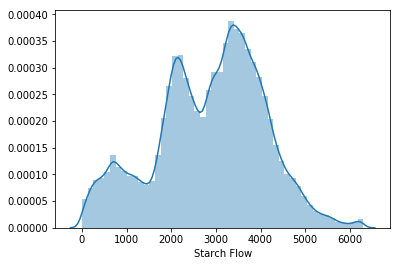

In [103]:
sn.distplot(data["Starch Flow"])
##Slightly left skewed.
##Not normally distributed (Seemed to very near to be normally distributed)

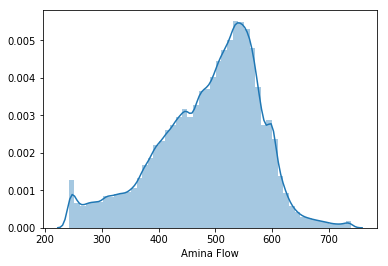

In [104]:
sn.distplot(data["Amina Flow"])
##Data is left skewed.
##Not normally distributed
##More number of times amina flow of 500-570 m3/h is used.

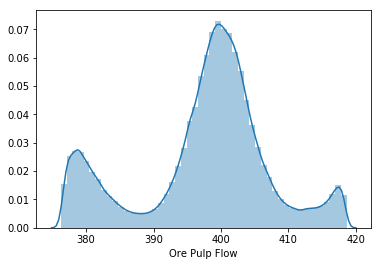

In [105]:
sn.distplot(data["Ore Pulp Flow"])
##Data is left skewed. Data is not normal.
##More number of times the ore pulp flow is maintained around 400t/h.
#There are actually 3 peaks if we see, around 380t/h, 400t/h and 417t/h.These are ore pulp which is being maintained more times.

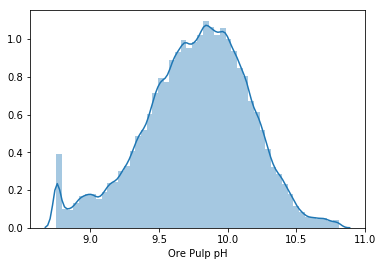

In [106]:
sn.distplot(data["Ore Pulp pH"])
##Slightly left skewed and data looks slightly normally distributed.
##Most of the times the pH maintained is between  9.5 to 10.3. Most number of times the pH maintained is around 9.7 (peak).
##There is a spike at the starting of the plot. Mostly it is around 8.5 and it can outliers.

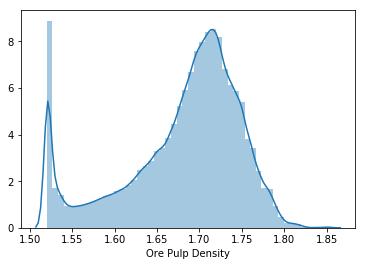

In [107]:
sn.distplot(data["Ore Pulp Density"])
##Data is left skewed and there is a huge spike at the beginning of the plot 1.52kg/cm³.
##The ore pulp density is maintained between 1.67kg/cm³ to 1.74kg/cm³.
## The Density maintained more number of times is around 1.52kg/cm³ and also 1.71-1.72kg/cm³.

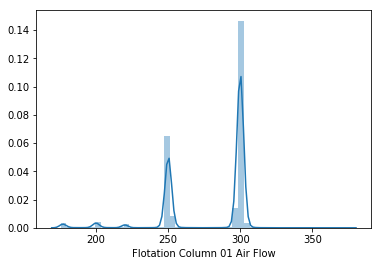

In [108]:
sn.distplot(data["Flotation Column 01 Air Flow"])
##Data is left skewed and The Air flow at column 01 is maintained between 249Nm³/h to 250Nm³/h and also 299 to 310Nm³/h.
##Most is between 280 to 310Nm³/h

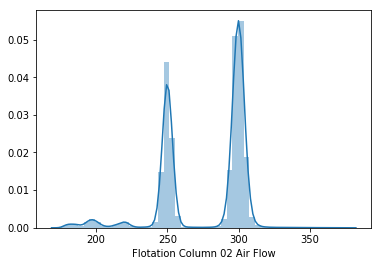

In [109]:
sn.distplot(data["Flotation Column 02 Air Flow"])
##Data is left skewed and The Air flow at column 02 is maintained between 240Nm³/h to 250Nm³/h and also 290 to 310Nm³/h.
##Most is between 290 to 310Nm³/h

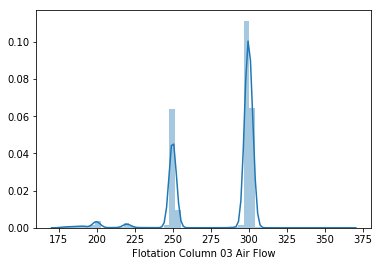

In [110]:
sn.distplot(data["Flotation Column 03 Air Flow"])
##Data is left skewed and The Air flow at column 03 is maintained between 240Nm³/h to 250Nm³/h and also 290 to 310Nm³/h.
##Most is between 290 to 310Nm³/h.

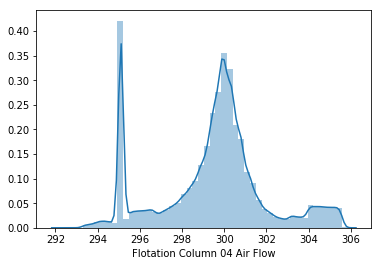

In [111]:
sn.distplot(data["Flotation Column 04 Air Flow"])
##Data is left skewed. Not normally distributed
##There is huge spike at around 295Nm³/h and most of times the air flow maintained is 299.7 to 300.3Nm³/h and also at 295Nm³/h.

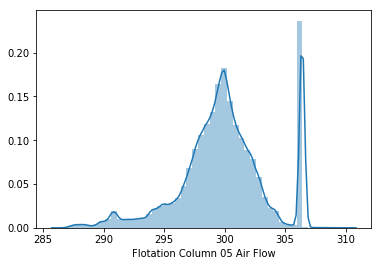

In [112]:
sn.distplot(data["Flotation Column 05 Air Flow"])
##Data is left skewed and in this case there is a spike at around 306Nm³/h to 307Nm³/h. 
##Most of the times it is maintained around 297Nm³/h to 302Nm³/h.
## The spike i.e.306Nm³/h to 307Nm³/h is maintained more number of times than the above mentioned.

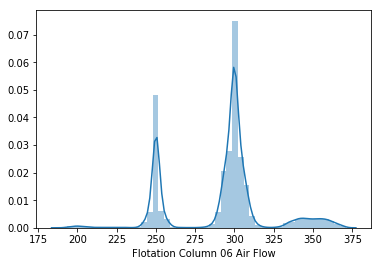

In [113]:
sn.distplot(data["Flotation Column 06 Air Flow"])
##Data is left skewed and data is not normal
##There are two peaks and these peaks shows that most times these air flow is maintained.i.e.
##first peak - 247Nm³/h to 250Nm³/h, second peak - 278Nm³/h to 300Nm³/h

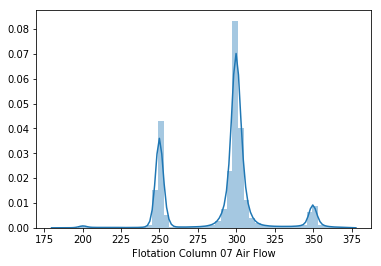

In [114]:
sn.distplot(data["Flotation Column 07 Air Flow"])
##Data is left skewed.Data is not normally distributed.
##There are three peaks and these indicates most times these airflow is maintained.
##First peak - 249Nm³/h to 250Nm³/h, Second peak - 278Nm³/h to 307Nm³/h.
##Third peak is a small peak and it is around 350Nm³/h.

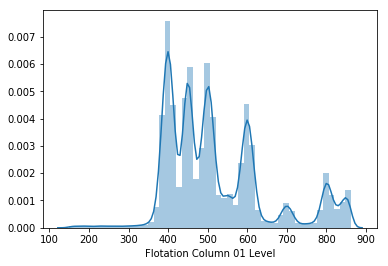

In [115]:
sn.distplot(data["Flotation Column 01 Level"])
#Data is right skewed and it is multimodal distribution. Data is not normally distributed.
## Most of the times the froth level formed is around, 380mm to 410mm, 430mm to460mm, 490mm to510mm, 570mm to 610mm.
##There are three smaller peaks of around 700mm, 800mm and 860mm, these are also the froth level formed most of the times.
##but the frequency is lesser than the previously mentioned.

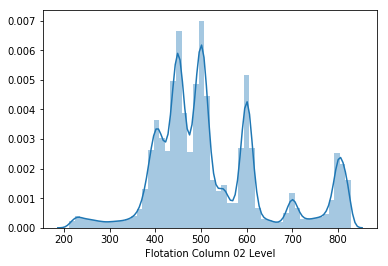

In [116]:
sn.distplot(data["Flotation Column 02 Level"])
##Data is right skewed and data is not normally distributed
##In flotation cell 02 around 400mm,440mm to 460mm,500m,600mm700mm and 800mm of froth level is formed most number of times.   

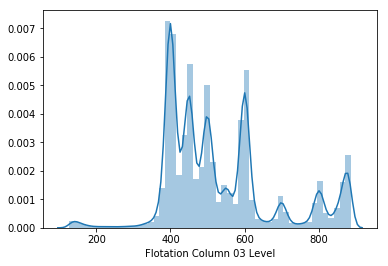

In [117]:
sn.distplot(data["Flotation Column 03 Level"])
##Data is slightly right skewed. Data is not normal
##In flotation cell 03 around 390mm to 410mm,450mm to 460mm,500m, 590mm to 610mm,800mm(small peaks) and also 850mm(smallpeaks)
##of froth level is formed most number of times.   

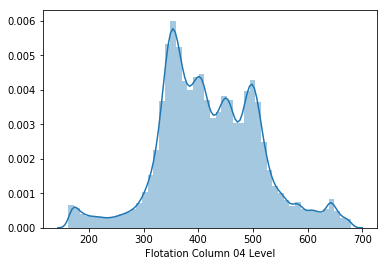

In [118]:
sn.distplot(data["Flotation Column 04 Level"])
##Data is slightly right skewed. Data is not normal.
##In flotation cell 04 around 340mm to 370mm, 390mm to 410mm, 440mm to 460mm, 490mm to 505mm 
##of froth level is formed most number of times.

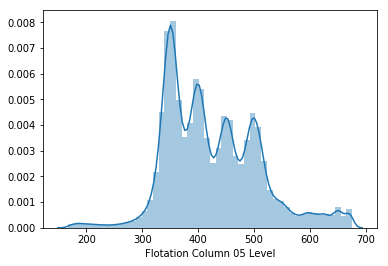

In [119]:
sn.distplot(data["Flotation Column 05 Level"])
##Data is slightly right skewed and data is not normal
####In flotation cell 05 around 340mm to 360mm, 380mm to 410mm, 440mm to 460mm, 490mm to 510mm 
##of froth level is formed most number of times.

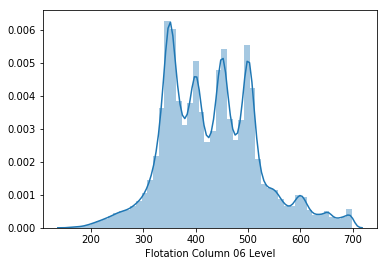

In [120]:
sn.distplot(data["Flotation Column 06 Level"])
##Data is slightly right skewed. Data is not normally distributed
##In flotation cell 06 around 340mm to 360mm, 390mm to 410mm, 440mm to 460mm, 490mm to 520mm 
##of froth level is formed most number of times.

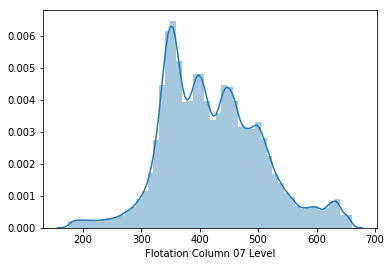

In [121]:
sn.distplot(data["Flotation Column 07 Level"])
##Data is right skewed and data is not normally distributed
##In flotation cell 07 around 340mm to 370mm, 390mm to 410mm, 440mm to 460mm,500mm 
##of froth level is formed most number of times.

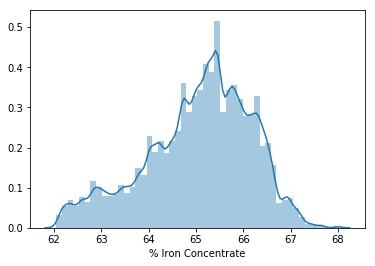

In [122]:
sn.distplot(data["% Iron Concentrate"])
##Data is left skewed and data is not normal
##The final %iron concentrate in iron ore is 65% to 66% most number of times.

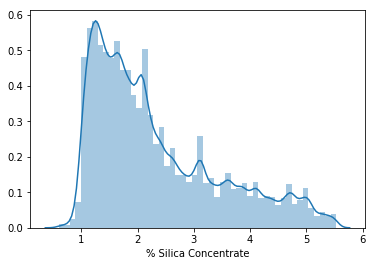

In [123]:
sn.distplot(data["% Silica Concentrate"])
##Data is highly right skewed and data is not normal.
##The final % Silica Concentrate in iron is 1% to 2% most number of times.

In [124]:
data2 = pd.DataFrame()
data2

""


C:\Users\Hello\Anaconda3\lib\site-packages\matplotlib\legend.py:497: UserWarning: Unrecognized location "middle". Falling back on "best"; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center

  % (loc, '\n\t'.join(self.codes)))


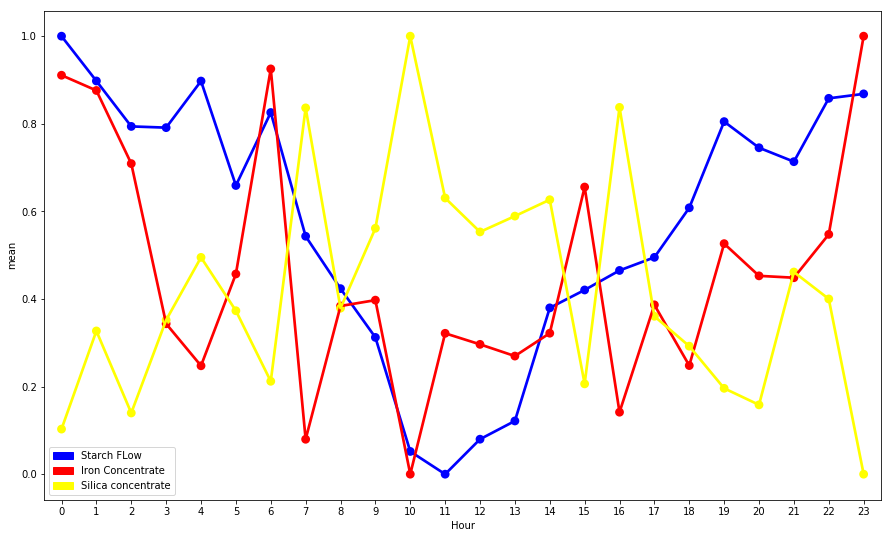

In [125]:
temp1 = data.groupby(data["date"].dt.hour).mean()
temp1 = temp1.reset_index()

data2["Starch Flow"] = temp1["Starch Flow"]
data2["% Iron Concentrate"] = temp1["% Iron Concentrate"]
data2["% Silica Concentrate"] = temp1["% Silica Concentrate"]

##Normalizing the data2 to be able to compare the variables as they are of different scales.
def norm_func(i):
     x = (i-i.min())/(i.max()-i.min())
     return (x)
data2 = norm_func(data2)
##Adding the data2 the temp1 date column
data2["Hour"] = temp1["date"]

##Plot
plt.figure(figsize = (15,9))
ax = sn.pointplot(x= data2["Hour"], y= data2["Starch Flow"], color = "blue", label = "Starch FLow")
ax = sn.pointplot(x= data2["Hour"], y= data2["% Iron Concentrate"], color ="red",label = "Iron Concentrate")
ax = sn.pointplot(x= data2["Hour"], y = data2["% Silica Concentrate"], color = "yellow", label = "Silica concentrate")
blue_patch = mpatches.Patch(color='blue', label='Starch FLow')
red_patch = mpatches.Patch(color='red', label='Iron Concentrate')
yellow_patch = mpatches.Patch(color ='yellow',label="Silica concentrate")
plt.legend(handles=[blue_patch, red_patch, yellow_patch], loc='middle',fontsize = 10)
ax.set_ylabel("mean")
plt.show()

In [126]:
temp1

,date,% Iron Feed,% Silica Feed,Starch Flow,Amina Flow,Ore Pulp Flow,Ore Pulp pH,Ore Pulp Density,Flotation Column 01 Air Flow,Flotation Column 02 Air Flow,Flotation Column 03 Air Flow,Flotation Column 04 Air Flow,Flotation Column 05 Air Flow,Flotation Column 06 Air Flow,Flotation Column 07 Air Flow,Flotation Column 01 Level,Flotation Column 02 Level,Flotation Column 03 Level,Flotation Column 04 Level,Flotation Column 05 Level,Flotation Column 06 Level,Flotation Column 07 Level,% Iron Concentrate,% Silica Concentrate
0,0,56.487709,14.237611,3027.352274,482.882538,397.401743,9.767663,1.684411,281.273706,278.584012,281.394118,299.453652,300.019756,293.140325,291.237640,507.252997,512.103815,528.194869,416.818502,416.416039,423.481160,415.206096,65.159382,2.219944
1,1,56.225697,14.859060,2989.429114,494.765484,398.002444,9.790216,1.690058,280.954708,278.210878,281.694534,299.392551,300.001829,292.855751,291.159630,503.930528,508.106387,520.335930,412.343524,416.391639,422.706782,412.923088,65.151016,2.295365
2,2,56.225497,14.859474,2950.949121,489.252180,398.209155,9.780938,1.682158,281.333927,278.423887,282.152066,299.408946,300.029994,292.841431,291.413198,501.878161,511.290042,511.264229,414.086209,416.894371,423.350884,411.884288,65.110878,2.232326
3,3,56.225497,14.859474,2949.916954,496.244891,398.434801,9.763553,1.690852,281.526312,278.662602,282.499410,299.439993,299.998572,293.483073,291.850687,511.236520,513.877614,509.862195,411.209418,419.683247,424.173566,412.916808,65.022970,2.303760
4,4,56.225497,14.859474,2989.349619,495.506578,398.723732,9.775254,1.688372,281.646462,278.692946,282.576955,299.427663,299.961408,293.188673,291.773735,509.974756,512.480206,513.892339,416.777965,422.274238,420.794541,414.433272,64.999906,2.351924
5,5,56.225497,14.859474,2900.935084,494.031104,398.265190,9.800408,1.687489,281.818628,278.900125,282.685219,299.444504,300.035788,293.337713,291.987906,508.767348,515.818526,516.141264,419.081784,423.899002,421.991287,416.925526,65.050297,2.310904
6,6,56.218294,14.870706,2962.715160,494.065812,397.489454,9.777836,1.688212,281.801665,279.118073,282.696427,299.478348,300.000308,293.429761,292.088343,508.890557,514.565155,519.428638,417.248189,423.950215,424.418756,418.590822,65.162860,2.256682
7,7,56.173000,14.894647,2857.956651,501.178131,397.519035,9.766601,1.689838,280.406957,277.817607,281.660934,299.457772,300.008715,292.247210,291.215442,516.419266,524.529645,527.546431,418.081998,424.247375,430.504767,420.933554,64.959569,2.466837
8,8,56.173000,14.894647,2813.596889,489.869028,397.298836,9.760718,1.678756,279.742874,276.984258,280.846605,299.455509,299.943526,291.882171,290.993054,527.921903,528.232369,538.074331,418.164268,426.500659,434.304152,421.407344,65.032721,2.312883
9,9,56.173000,14.894647,2772.304083,485.247790,397.057815,9.745490,1.679728,278.073188,275.371940,279.443645,299.466170,299.917956,291.425977,290.542353,532.663559,535.166262,541.231608,422.690292,428.307383,438.482327,424.961306,65.035927,2.374298


C:\Users\Hello\Anaconda3\lib\site-packages\matplotlib\legend.py:497: UserWarning: Unrecognized location "middle". Falling back on "best"; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center

  % (loc, '\n\t'.join(self.codes)))


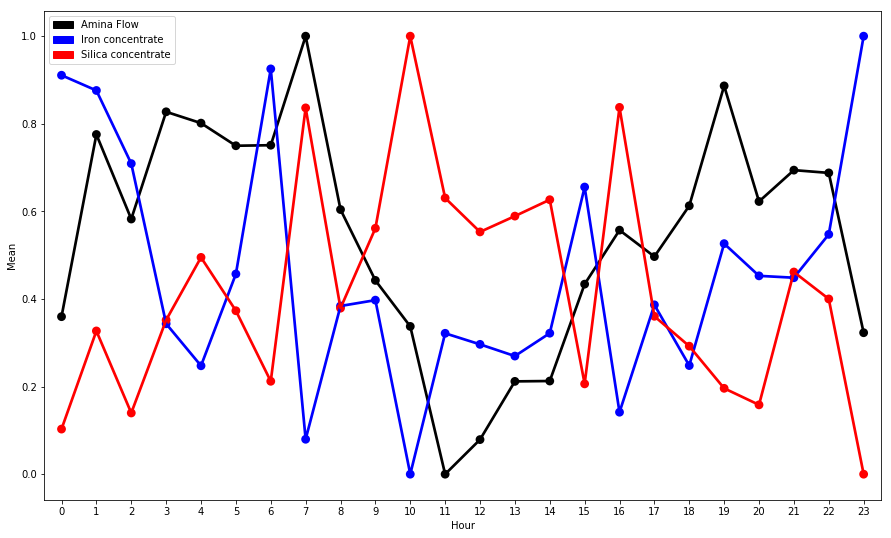

In [127]:
##Plotting Amina flow, %iron concentrate and %silica concentrate
data3 = pd.DataFrame()
data3

data3["Amina Flow"] =  temp1["Amina Flow"]
data3["% Iron Concentrate"] = temp1["% Iron Concentrate"]
data3["% Silica Concentrate"] = temp1["% Silica Concentrate"]
##Normalizing the data3 , as to bring all the variables mentioned above to similar scale to compare.
def norm_func(i):
     x = (i-i.min())/(i.max()-i.min())
     return (x)
data3 = norm_func(data3)
data3["Hour"] =  temp1["date"]

##Plot
plt.figure(figsize=(15,9))
ax = sn.pointplot(x=data3["Hour"], y=data3["Amina Flow"], color = "black",label="Amina Flow")
ax= sn.pointplot(x=data3["Hour"], y=data3["% Iron Concentrate"], color = 'blue',label = "Iron concentrate")
ax = sn.pointplot(x=data3["Hour"], y=data3["% Silica Concentrate"], color = "red", label = "Silica concentrate")
ax.set_xlabel("Hour")
ax.set_ylabel("Mean")
black_patch = mpatches.Patch(color = "black",label ="Amina Flow") 
blue_patch = mpatches.Patch(color ="blue", label = "Iron concentrate")
red_patch =mpatches.Patch(color ="red", label ="Silica concentrate")
plt.legend(handles=[black_patch,blue_patch,red_patch], loc ="middle", fontsize =10)
plt.show()


<Figure size 1080x648 with 0 Axes>

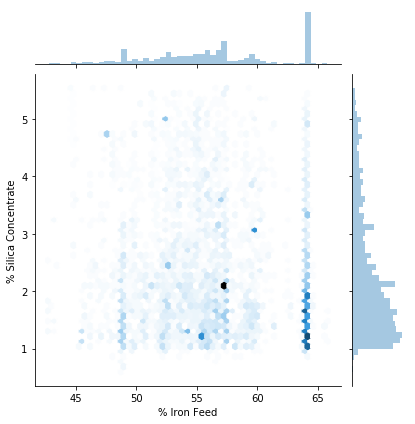

In [128]:
plt.figure(figsize=(15,9))
sn.jointplot(x="% Iron Feed", y="% Silica Concentrate", data = data,kind='hex')
plt.show()

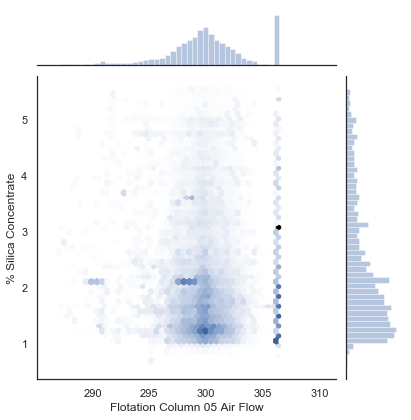

In [129]:
sn.set(style='white')
sn.jointplot("Flotation Column 05 Air Flow", "% Silica Concentrate", data = data, kind='hex');


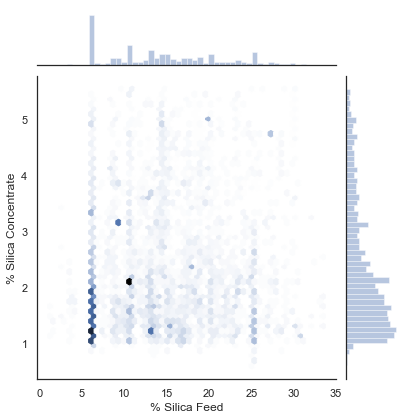

In [130]:
sn.set(style='white')
sn.jointplot(x=data["% Silica Feed"], y=data["% Silica Concentrate"], kind = "hex")
plt.show()

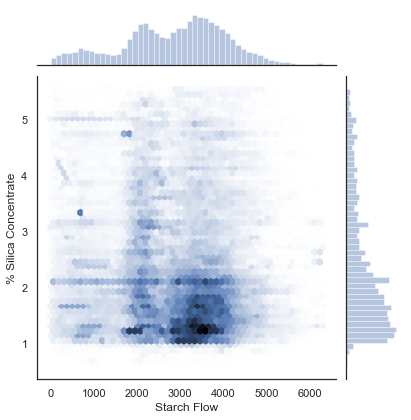

In [131]:
sn.set(style='white')
sn.jointplot(x=data["Starch Flow"], y=data["% Silica Concentrate"], kind = "hex")
plt.show()

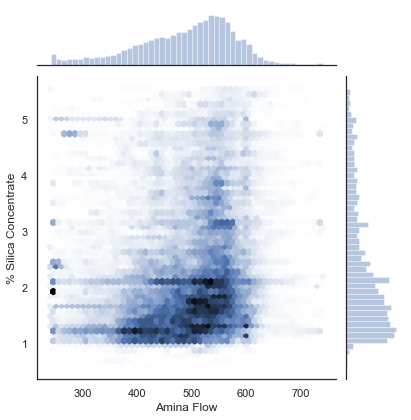

In [132]:
sn.set(style='white')
sn.jointplot(x=data["Amina Flow"], y=data["% Silica Concentrate"], kind = "hex")
plt.show()

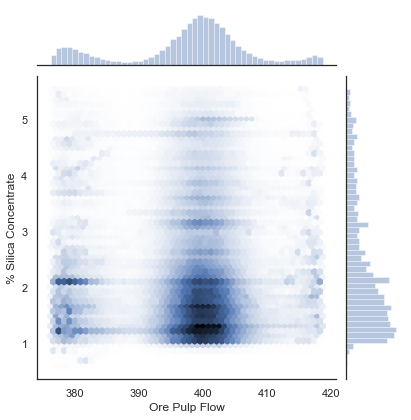

In [133]:
sn.set(style='white')
sn.jointplot(x=data["Ore Pulp Flow"], y=data["% Silica Concentrate"], kind = "hex")
plt.show()

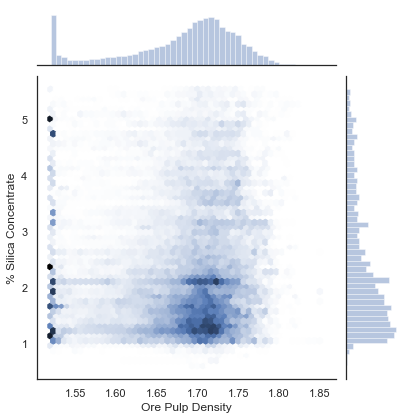

In [134]:
sn.set(style='white')
sn.jointplot(x=data["Ore Pulp Density"], y=data["% Silica Concentrate"], kind = "hex")
plt.show()

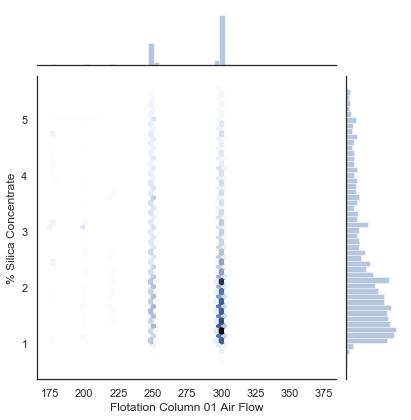

In [135]:
sn.set(style='white')
sn.jointplot(x=data["Flotation Column 01 Air Flow"], y=data["% Silica Concentrate"], kind = "hex")
plt.show()

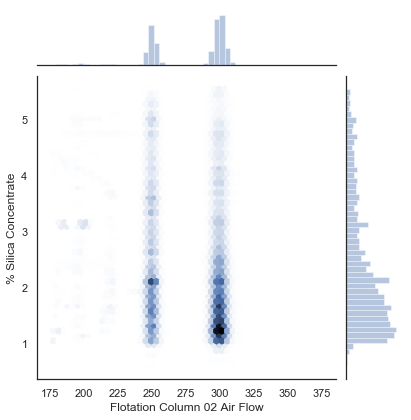

In [136]:
sn.set(style='white')
sn.jointplot(x=data["Flotation Column 02 Air Flow"], y=data["% Silica Concentrate"], kind = "hex")
plt.show()

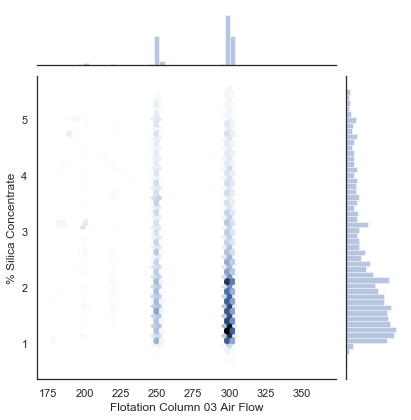

In [137]:
sn.set(style='white')
sn.jointplot(x=data["Flotation Column 03 Air Flow"], y=data["% Silica Concentrate"], kind = "hex")
plt.show()

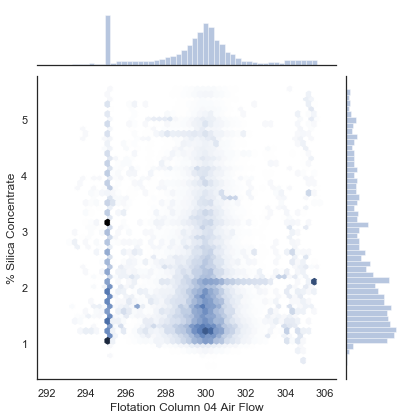

In [138]:
sn.set(style='white')
sn.jointplot(x=data["Flotation Column 04 Air Flow"], y=data["% Silica Concentrate"], kind = "hex")
plt.show()

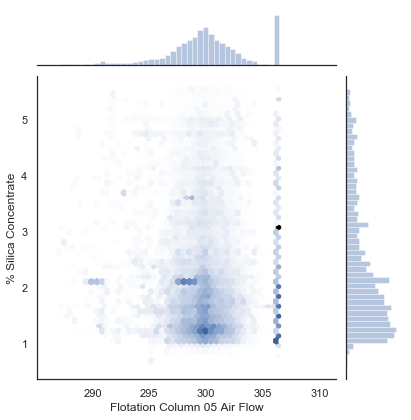

In [139]:
sn.set(style='white')
sn.jointplot(x=data["Flotation Column 05 Air Flow"], y=data["% Silica Concentrate"], kind = "hex")
plt.show()

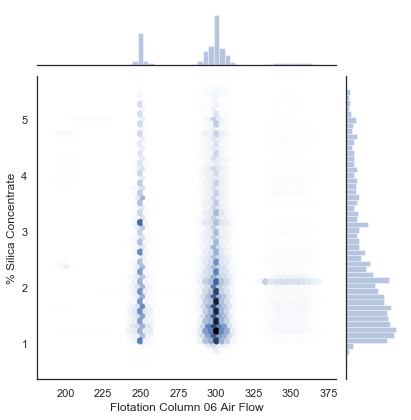

In [140]:
sn.set(style='white')
sn.jointplot(x=data["Flotation Column 06 Air Flow"], y=data["% Silica Concentrate"], kind = "hex")
plt.show()

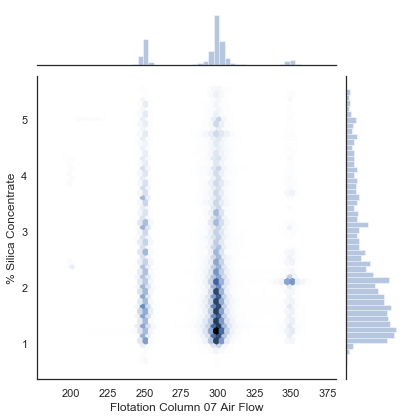

In [141]:
sn.set(style='white')
sn.jointplot(x=data["Flotation Column 07 Air Flow"], y=data["% Silica Concentrate"], kind = "hex")
plt.show()

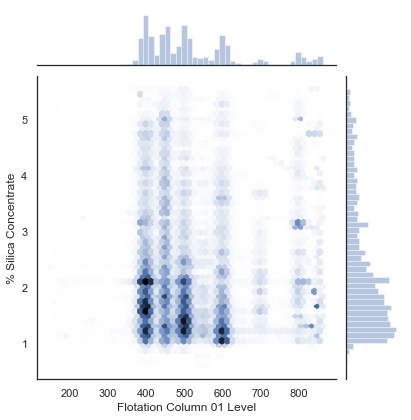

In [142]:
sn.set(style='white')
sn.jointplot(x=data["Flotation Column 01 Level"], y=data["% Silica Concentrate"], kind = "hex")
plt.show()

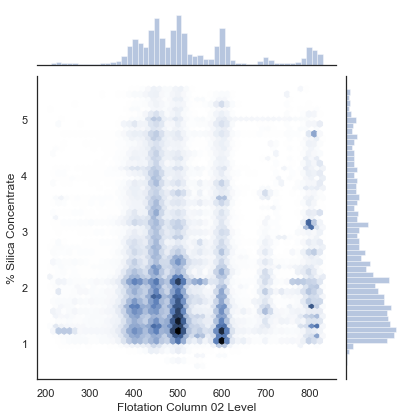

In [143]:
sn.set(style='white')
sn.jointplot(x=data["Flotation Column 02 Level"], y=data["% Silica Concentrate"], kind = "hex")
plt.show()

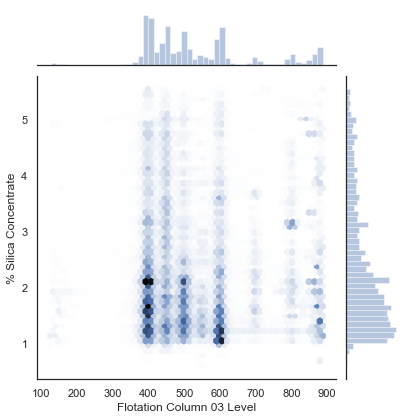

In [144]:
sn.set(style='white')
sn.jointplot(x=data["Flotation Column 03 Level"], y=data["% Silica Concentrate"], kind = "hex")
plt.show()

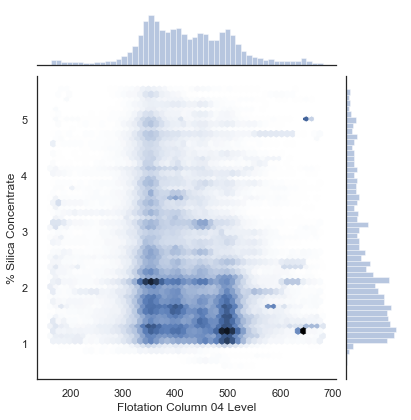

In [145]:
sn.set(style='white')
sn.jointplot(x=data["Flotation Column 04 Level"], y=data["% Silica Concentrate"], kind = "hex")
plt.show()

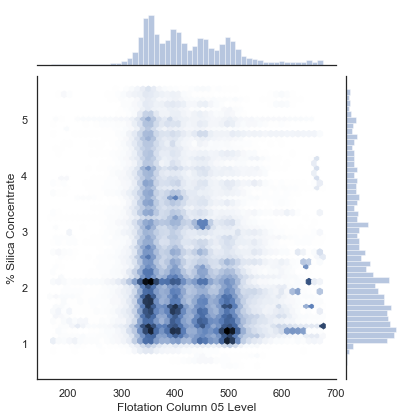

In [146]:
sn.set(style='white')
sn.jointplot(x=data["Flotation Column 05 Level"], y=data["% Silica Concentrate"], kind = "hex")
plt.show()

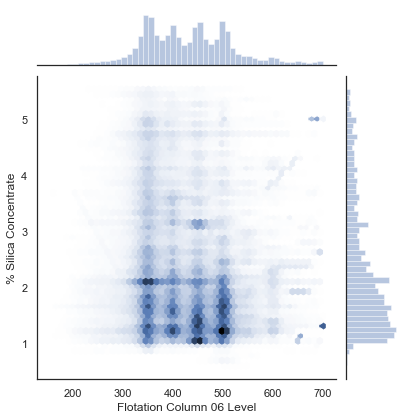

In [147]:
sn.set(style='white')
sn.jointplot(x=data["Flotation Column 06 Level"], y=data["% Silica Concentrate"], kind = "hex")
plt.show()

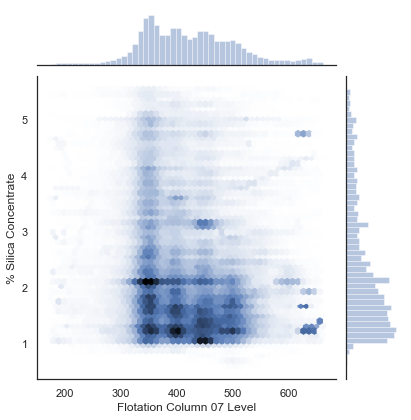

In [150]:
sn.set(style='white')
sn.jointplot(x=data["Flotation Column 07 Level"], y=data["% Silica Concentrate"], kind = "hex")
plt.show()

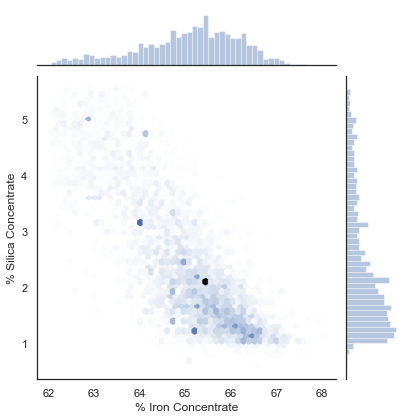

In [151]:
sn.set(style='white')
sn.jointplot(x=data["% Iron Concentrate"], y=data["% Silica Concentrate"], kind = "hex")
plt.show()

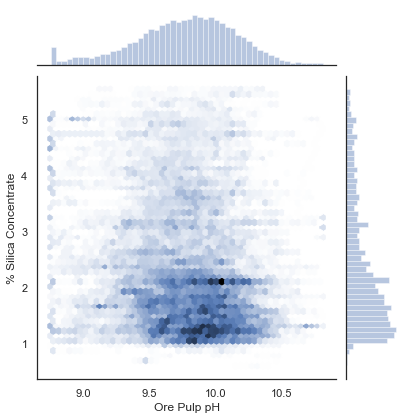

In [5]:
sn.set(style='white')
sn.jointplot(x=data["Ore Pulp pH"], y=data["% Silica Concentrate"], kind = "hex")
plt.show()

In [4]:
data.describe()

,% Iron Feed,% Silica Feed,Starch Flow,Amina Flow,Ore Pulp Flow,Ore Pulp pH,Ore Pulp Density,Flotation Column 01 Air Flow,Flotation Column 02 Air Flow,Flotation Column 03 Air Flow,Flotation Column 04 Air Flow,Flotation Column 05 Air Flow,Flotation Column 06 Air Flow,Flotation Column 07 Air Flow,Flotation Column 01 Level,Flotation Column 02 Level,Flotation Column 03 Level,Flotation Column 04 Level,Flotation Column 05 Level,Flotation Column 06 Level,Flotation Column 07 Level,% Iron Concentrate,% Silica Concentrate
count,737453.000000,737453.000000,737453.000000,737453.000000,737453.000000,737453.000000,737453.000000,737453.000000,737453.000000,737453.000000,737453.000000,737453.000000,737453.000000,737453.000000,737453.000000,737453.000000,737453.000000,737453.000000,737453.000000,737453.000000,737453.000000,737453.000000,737453.000000
mean,56.294739,14.651716,2869.140569,488.144697,397.578372,9.767639,1.680380,280.151856,277.159965,281.082397,299.447794,299.917814,292.071485,290.754856,520.244823,522.649555,531.352662,420.320973,425.251706,429.941018,421.021231,65.050068,2.326763
std,5.157744,6.807439,1215.203734,91.230534,9.699785,0.387007,0.069249,29.621288,30.149357,28.558268,2.572538,3.636579,30.217804,28.670105,131.014924,128.165050,150.842164,91.794432,84.535822,89.862225,84.891491,1.118645,1.125554
min,42.740000,1.310000,0.002026,241.669000,376.249000,8.753340,1.519820,175.510000,175.156000,176.469000,292.195000,286.295000,189.928000,185.962000,149.218000,210.752000,126.255000,162.201000,166.991000,155.841000,175.349000,62.050000,0.600000
25%,52.670000,8.940000,2076.320000,431.796000,394.264000,9.527360,1.647310,250.281000,250.457000,250.855000,298.262566,298.068000,262.541000,256.302000,416.978000,441.883000,411.325000,356.679000,357.653000,358.497000,356.772000,64.370000,1.440000
50%,56.080000,13.850000,3018.430000,504.393000,399.249000,9.798100,1.697600,299.344000,296.223000,298.696000,299.805000,299.887120,299.477000,299.011000,491.878000,495.956000,494.318000,411.974000,408.773000,424.664575,411.065000,65.210000,2.000000
75%,59.720000,19.600000,3727.730000,553.257000,402.968000,10.038000,1.728330,300.149000,300.690000,300.382000,300.638000,301.791137,303.061000,301.904000,594.114000,595.464000,601.249000,485.549000,484.329000,492.684000,476.465000,65.860000,3.010000
max,65.780000,33.400000,6300.230000,739.538000,418.641000,10.808100,1.853250,373.871000,375.992000,364.346000,305.871000,310.270000,370.910000,371.593000,862.274000,828.919000,886.822000,680.359000,675.644000,698.861000,659.902000,68.010000,5.530000


In [6]:
data.head(2)

,date,% Iron Feed,% Silica Feed,Starch Flow,Amina Flow,Ore Pulp Flow,Ore Pulp pH,Ore Pulp Density,Flotation Column 01 Air Flow,Flotation Column 02 Air Flow,Flotation Column 03 Air Flow,Flotation Column 04 Air Flow,Flotation Column 05 Air Flow,Flotation Column 06 Air Flow,Flotation Column 07 Air Flow,Flotation Column 01 Level,Flotation Column 02 Level,Flotation Column 03 Level,Flotation Column 04 Level,Flotation Column 05 Level,Flotation Column 06 Level,Flotation Column 07 Level,% Iron Concentrate,% Silica Concentrate
0,2017-03-10 01:00:00,55.2,16.98,3019.53,557.434,395.713,10.0664,1.74,249.214,253.235,250.576,295.096,306.4,250.225,250.884,457.396,432.962,424.954,443.558,502.255,446.370,523.344,66.91,1.31
1,2017-03-10 01:00:00,55.2,16.98,3024.41,563.965,397.383,10.0672,1.74,249.719,250.532,250.862,295.096,306.4,250.137,248.994,451.891,429.560,432.939,448.086,496.363,445.922,498.075,66.91,1.31


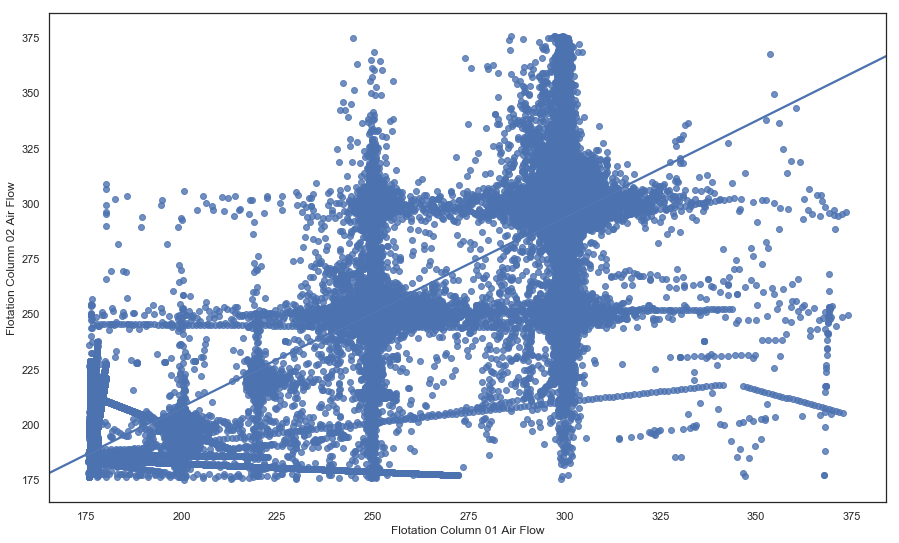

In [9]:
## Scatter plots
plt.figure(figsize = (15,9))
sn.regplot(x="Flotation Column 01 Air Flow", y="Flotation Column 02 Air Flow", data =  data)

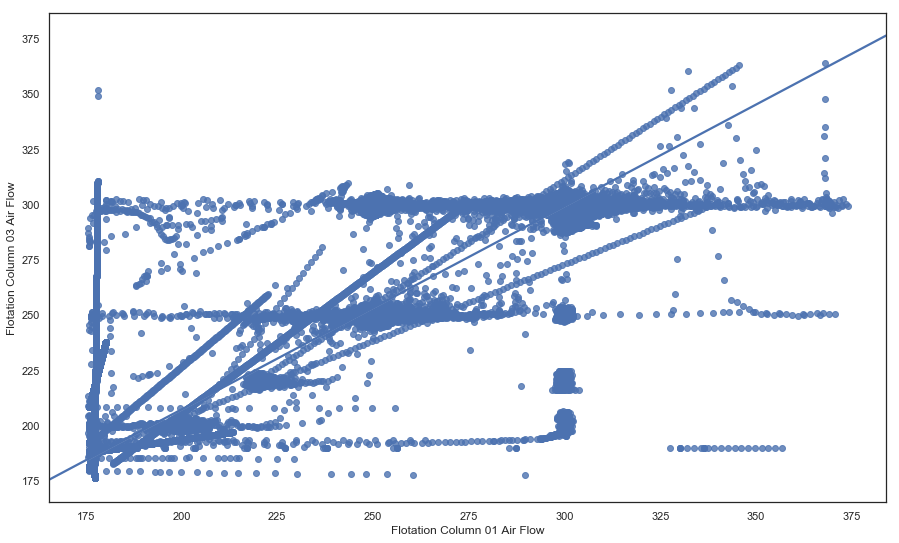

In [10]:
plt.figure(figsize = (15,9))
sn.regplot(x="Flotation Column 01 Air Flow", y="Flotation Column 03 Air Flow", data =  data)

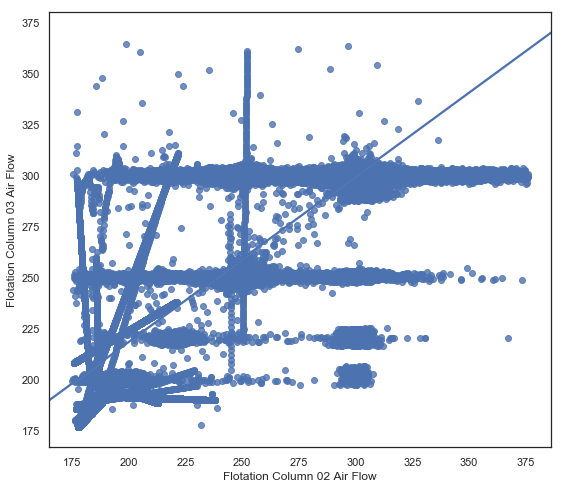

In [11]:
plt.figure(figsize = (9,8))
sn.regplot(x="Flotation Column 02 Air Flow", y="Flotation Column 03 Air Flow", data =  data)

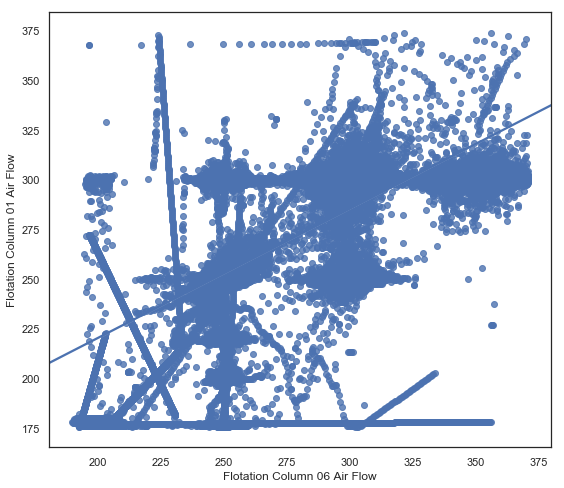

In [12]:
plt.figure(figsize = (9,8))
sn.regplot(x="Flotation Column 06 Air Flow", y="Flotation Column 01 Air Flow", data =  data)

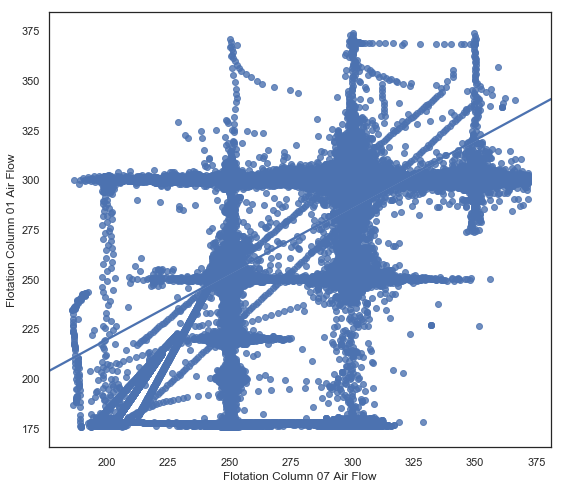

In [13]:
plt.figure(figsize = (9,8))
sn.regplot(x="Flotation Column 07 Air Flow", y="Flotation Column 01 Air Flow", data =  data)

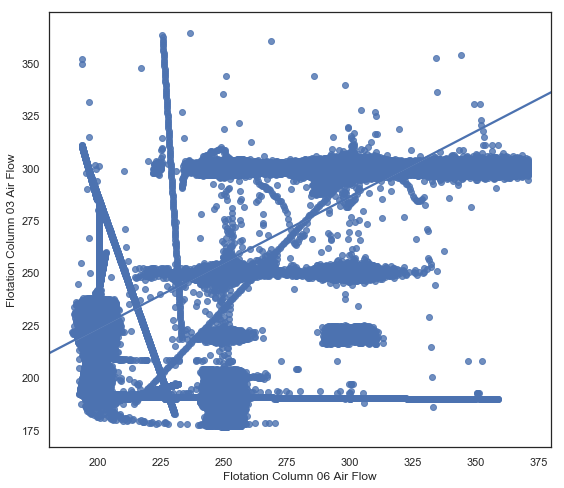

In [14]:
plt.figure(figsize = (9,8))
sn.regplot(x="Flotation Column 06 Air Flow", y="Flotation Column 03 Air Flow", data =  data)

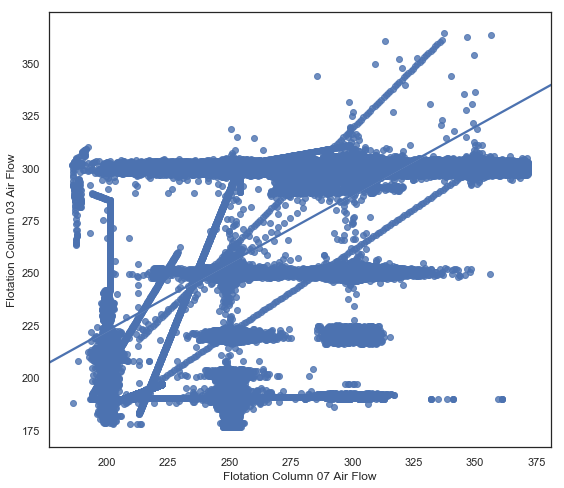

In [15]:
plt.figure(figsize = (9,8))
sn.regplot(x="Flotation Column 07 Air Flow", y="Flotation Column 03 Air Flow", data =  data)

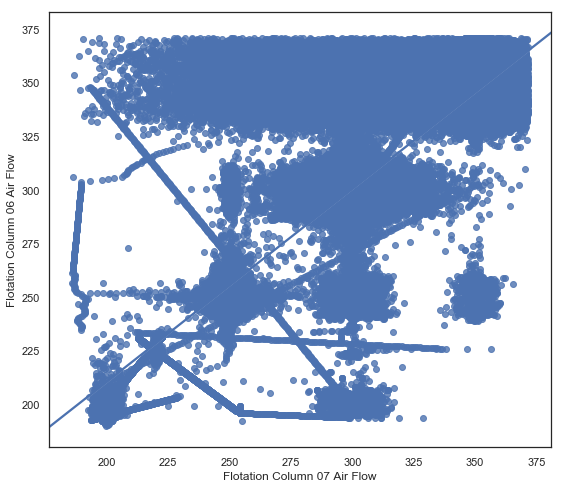

In [16]:
plt.figure(figsize = (9,8))
sn.regplot(x="Flotation Column 07 Air Flow", y="Flotation Column 06 Air Flow", data =  data)

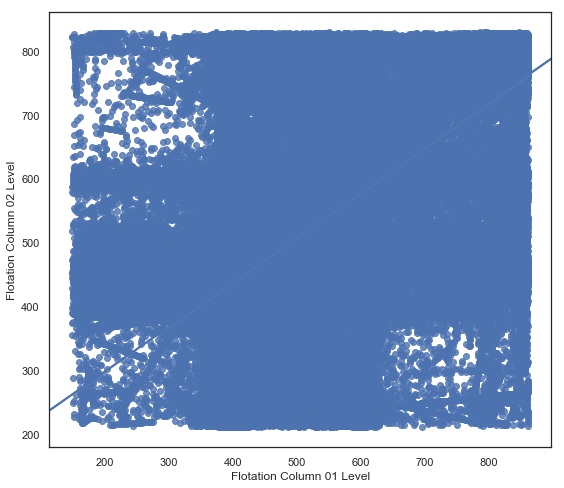

In [17]:
plt.figure(figsize = (9,8))
sn.regplot(x="Flotation Column 01 Level", y="Flotation Column 02 Level", data =  data)

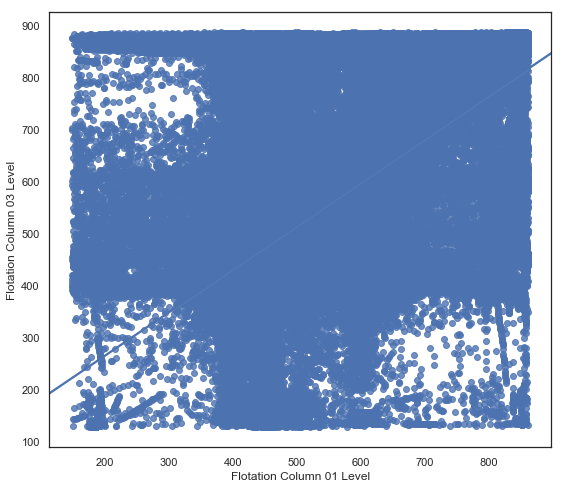

In [18]:
plt.figure(figsize = (9,8))
sn.regplot(x="Flotation Column 01 Level", y="Flotation Column 03 Level", data =  data)

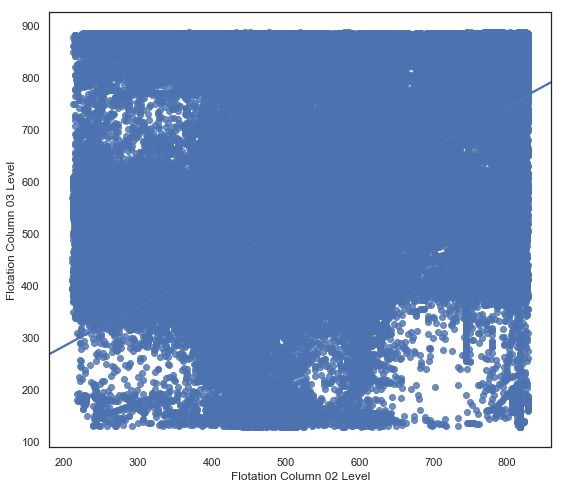

In [19]:
plt.figure(figsize = (9,8))
sn.regplot(x="Flotation Column 02 Level", y="Flotation Column 03 Level", data =  data)

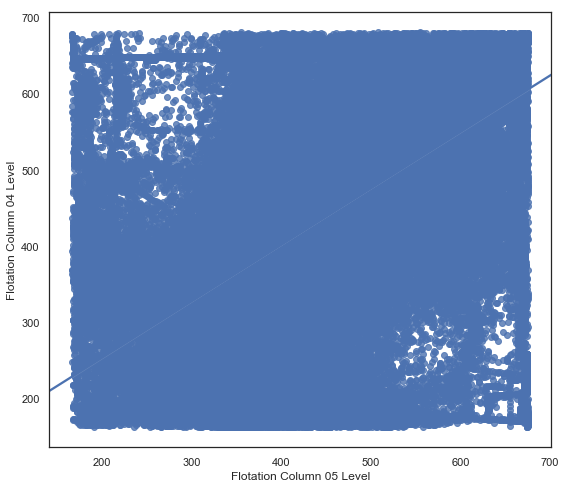

In [20]:
plt.figure(figsize = (9,8))
sn.regplot(x="Flotation Column 05 Level", y="Flotation Column 04 Level", data =  data)

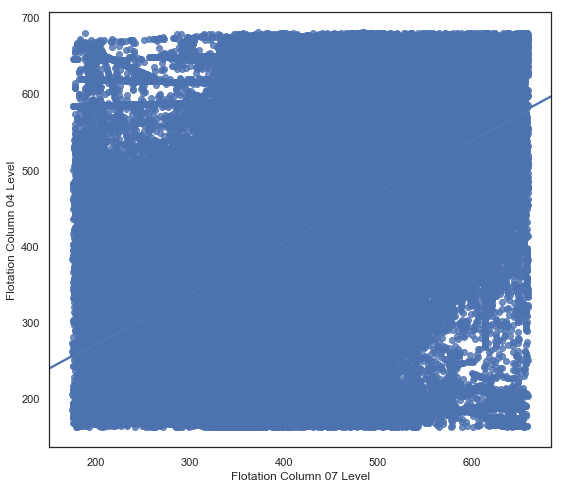

In [21]:
plt.figure(figsize = (9,8))
sn.regplot(x="Flotation Column 07 Level", y="Flotation Column 04 Level", data =  data)

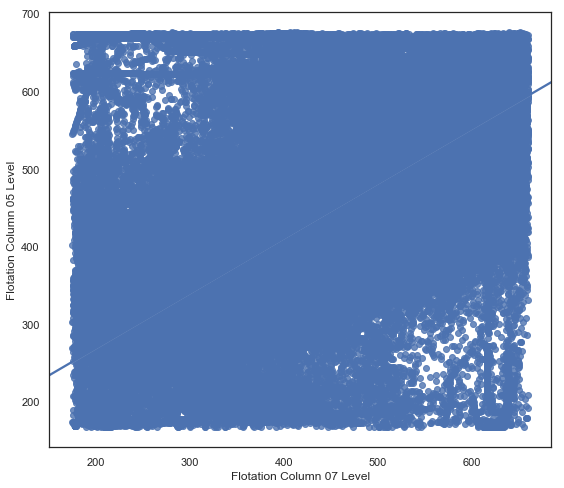

In [22]:
plt.figure(figsize = (9,8))
sn.regplot(x="Flotation Column 07 Level", y="Flotation Column 05 Level", data =  data)

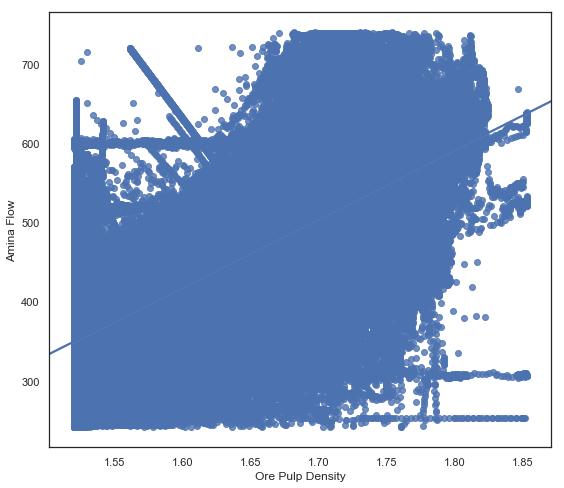

In [23]:
plt.figure(figsize = (9,8))
sn.regplot(x="Ore Pulp Density", y="Amina Flow", data =  data)

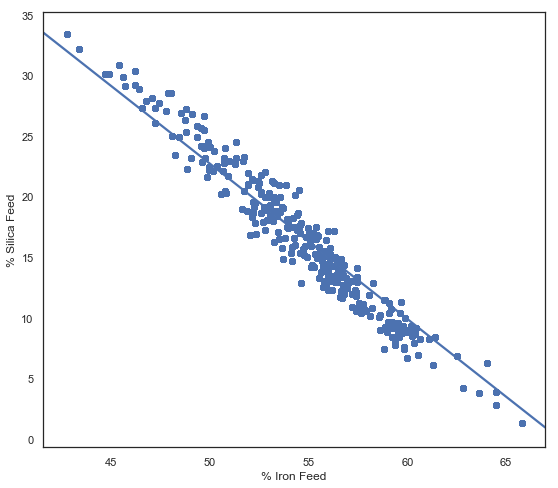

In [24]:
plt.figure(figsize = (9,8))
sn.regplot(x="% Iron Feed", y="% Silica Feed", data = data)